# K Nearest Neighbors

The k-nearest neighbors algorithm as described in the README.md file will be used to predict the percent of the population 25+ in a country that have completed a minimum of secondary school (have a high school diploma). Here, features will include various socioeconomic metrics, such as GDP per capital, population density, individuals using the internet, gini index, etc. For the KNN implementation, I will be using the k-nearest neighbors algorithm in scikit-learn as well as writing the alogrithm from scratch in a function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file with all country transit and socioeconomic data
df = pd.read_csv("CountryData1.csv")

In [3]:
# clean up data file

# dependent variable: Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)
# isolate the following independent variables:
#		PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
#		GDP per capita (current US$)
#		Fossil fuel energy consumption (% of total)
#		Individuals using the Internet (% of population)
#		Gini index

row_ind = [10, 20, 22, 23, 26, 28, 29, 25]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Unnamed: 0,Time,Time Code,Indicator Name,Indicator Code,Armenia [ARM],Austria [AUT],Belgium [BEL],Bolivia [BOL],Brazil [BRA],...,Romania [ROU],Serbia [SRB],Slovak Republic [SVK],Spain [ESP],Sweden [SWE],Switzerland [CHE],Thailand [THA],United Kingdom [GBR],United States [USA],Uruguay [URY]
10,10,2013,YR2013,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,24.799,15.916,15.904,27.791,11.442,...,19.1,19.868,19.022,9.76,5.579,12.092,25.07,12.29,8.528,11.516
20,20,2013,YR2013,Total world transport-related GHG emissions (m...,EN.CO2.TRAN.ZS,1.3,22.8,24.3,7,208.1,...,14.8,5.6,6.5,82.2,19.7,17.1,62.4,114,1700.8,3.5
22,22,2013,YR2013,GDP per capita (current US$),NY.GDP.PCAP.CD,3680.166922,50305.35458,46964.59468,2870.02377,12458.89121,...,9497.674116,7040.418121,18312.78051,29218.91052,60844.27671,87304.33058,6018.082447,43426.29814,53409.75078,18335.25948
23,23,2013,YR2013,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,55.80763154,36.86792098,18.06752571,23.51672472,12.05439532,...,17.32612127,34.11792821,14.21770288,16.38355799,17.44664542,21.79078132,27.68365506,15.98107676,7.213039526,53.20437542
26,26,2013,YR2013,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,75.51,66.1,70.58,84.21,57.92,...,73.42,88.53,63.81,72.37,30.28,52.66,80.68,84.28,83.08,53


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[3]
df_knn = df_transposed.iloc[5:,:]
df_knn = df_knn.astype(float)
df_knn.head()

Indicator Name,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Total world transport-related GHG emissions (million tonnes),GDP per capita (current US$),Population in the largest city (% of urban population),Fossil fuel energy consumption (% of total),Individuals using the Internet (% of population),Gini index,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
Armenia [ARM],24.799,1.3,3680.166922,55.807632,75.51,41.9,30.6,99.052444
Austria [AUT],15.916,22.8,50305.354580,36.867921,66.10,80.6,30.8,99.285652
Belgium [BEL],15.904,24.3,46964.594680,18.067526,70.58,82.2,27.7,81.589996
Bolivia [BOL],27.791,7.0,2870.023770,23.516725,84.21,37.0,47.6,58.650002
Brazil [BRA],11.442,208.1,12458.891210,12.054395,57.92,51.0,52.7,55.759998


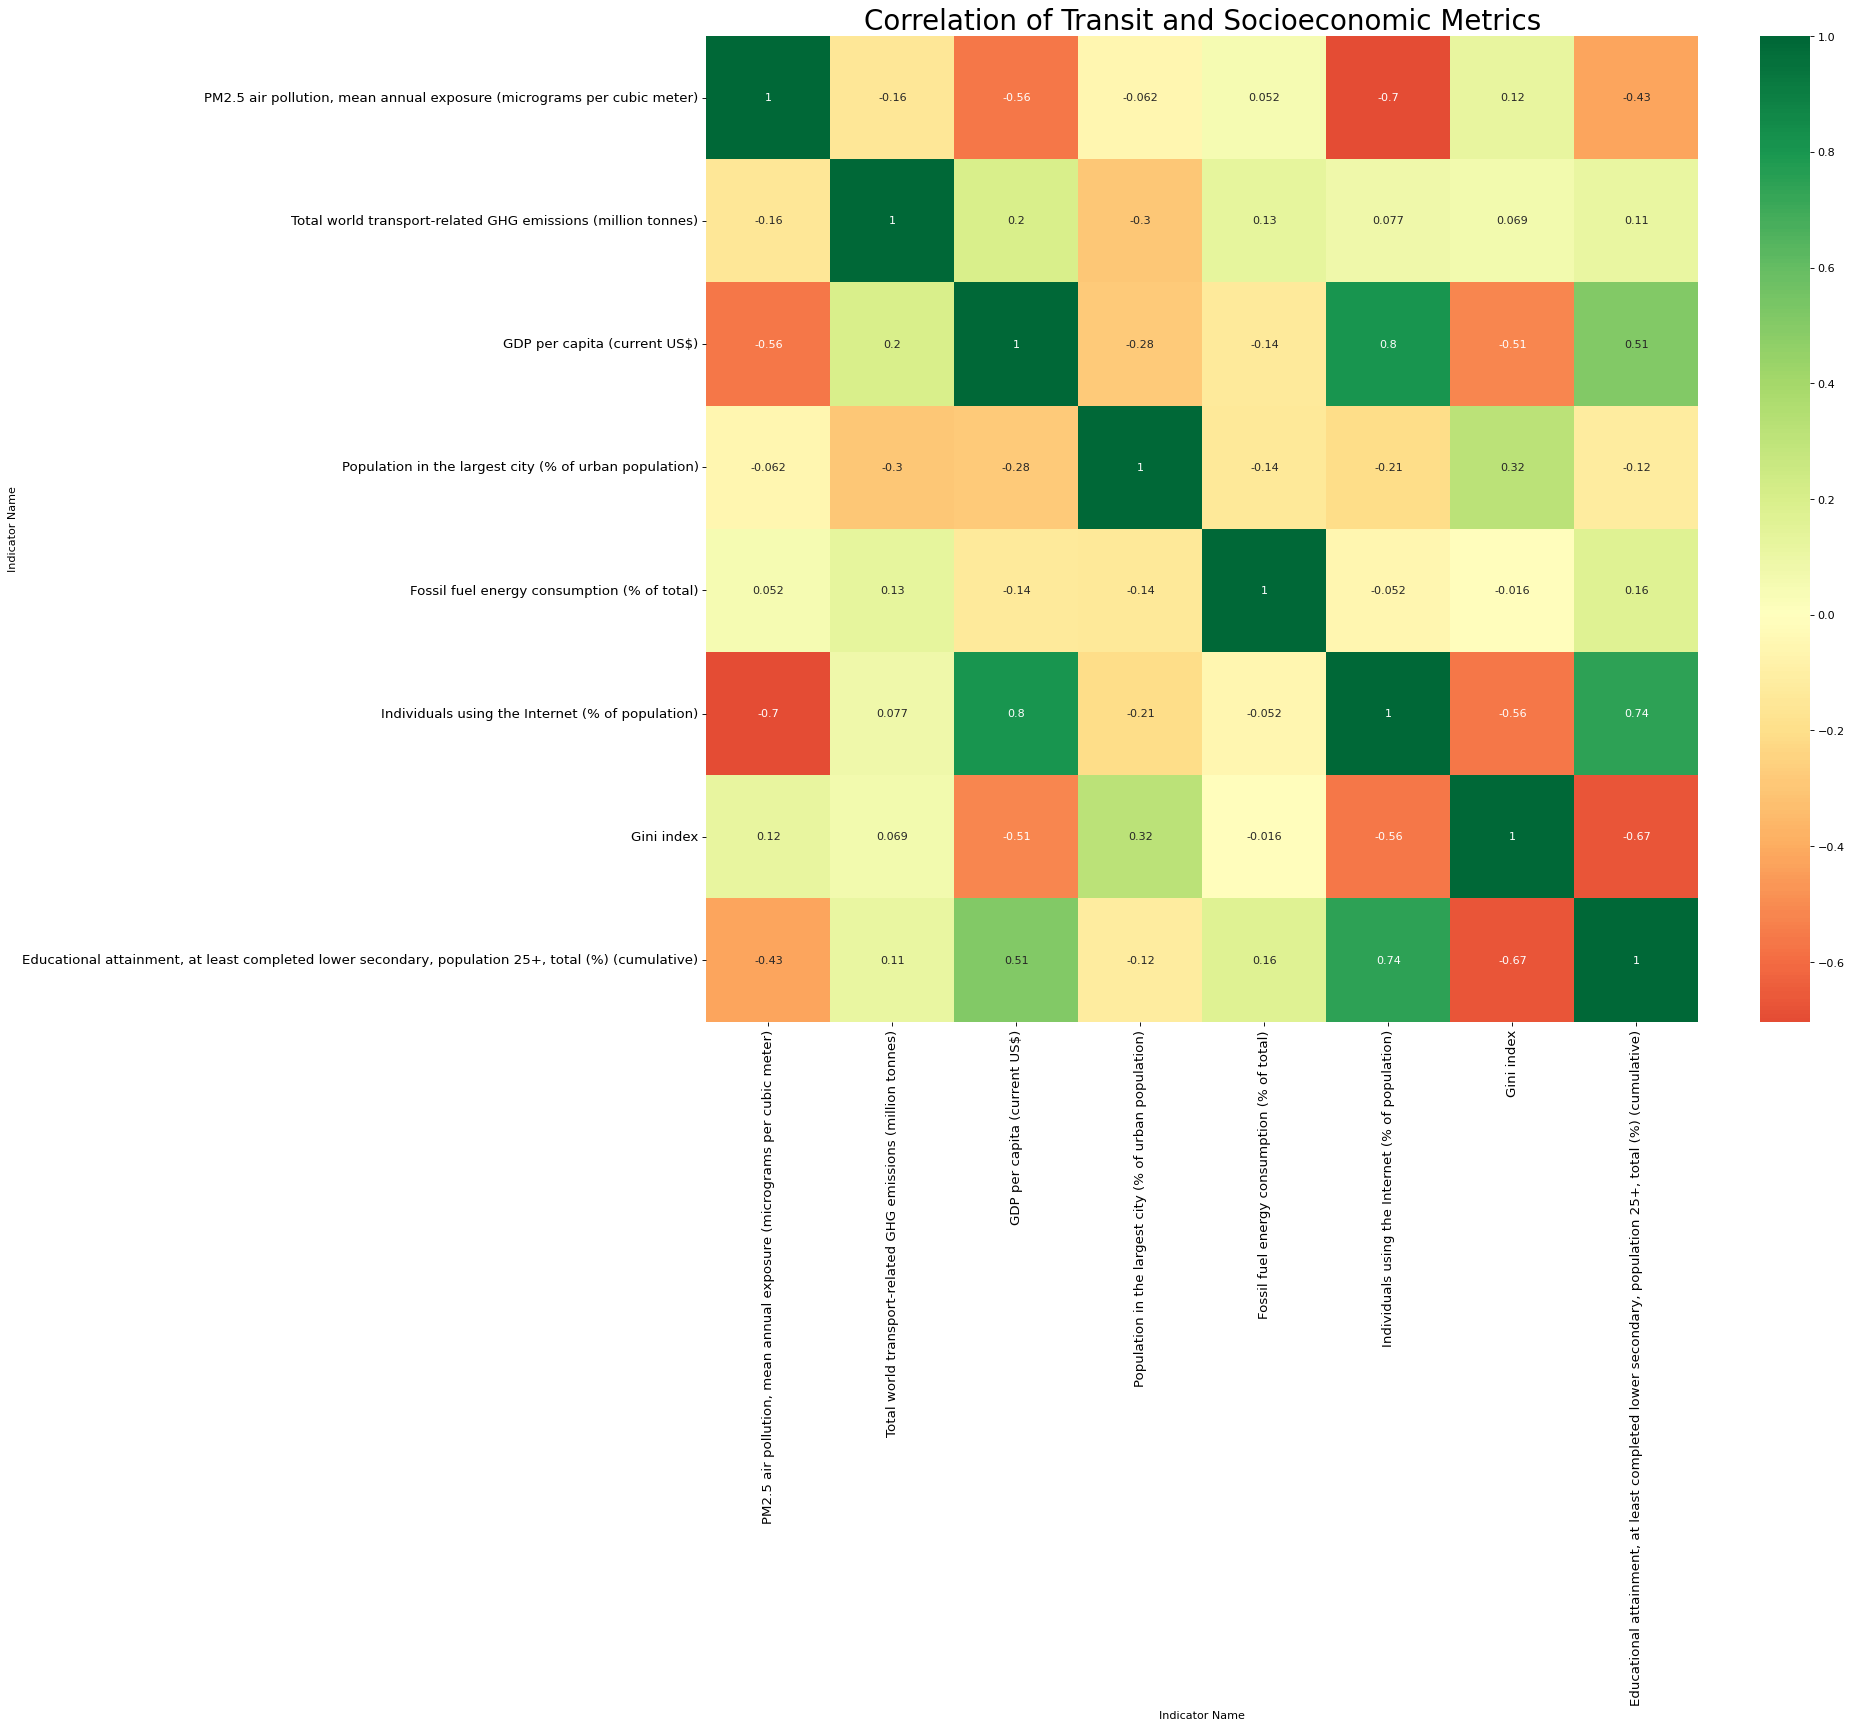

In [5]:
# plot correlation chart
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df_knn.corr(), xticklabels=df_knn.corr().columns, yticklabels=df_knn.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation of Transit and Socioeconomic Metrics', fontsize=25)
plt.show()

### Using KNN in sci-kit learn

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# split X and y + train/test data

# split X and target y
X = df_knn.iloc[:,0:5]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use this X_scaled in your model
y = df_knn.iloc[:,5]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.27, random_state=42)

In [188]:
# initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [189]:
# make predictions
y_pred = knn.predict(X_test)

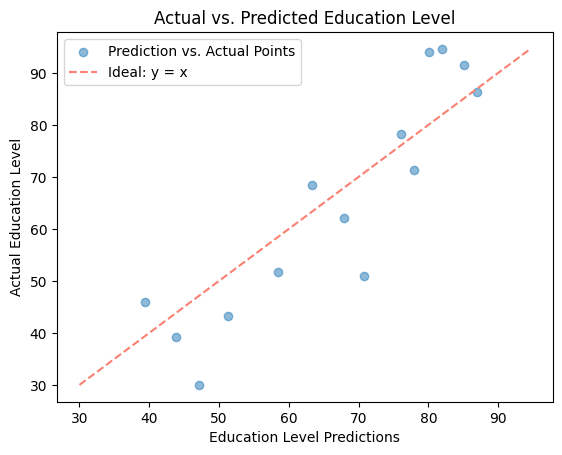

In [ ]:
# actual vs. prediction on test
fig = plt.figure()
plt.scatter(y_pred, y_test, alpha=0.5, label = 'Prediction vs. Actual Points') #test data points

# plot y=x line to determine accuracy of predictions
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], '--', color = 'salmon', label='Ideal: y = x')

plt.legend()
plt.xlabel('Education Level Predictions')
plt.ylabel('Actual Education Level')
plt.title("Actual vs. Predicted Education Level")
plt.show()

In [190]:
# evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# print metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 8.29
MSE: 96.97
RMSE: 9.85
R² Score: 0.78


### Conclusion with sci-kit learn

Using k-nearest neighbors in sci-kit learn, this algorithm can provide relatively accurate predictions about the percent of the population of a country that have completed high school or above. The results make sense, as developed countries and countries where income is more uniform tend to have more educated citizens. However, this is not the case with all countries, and we can observe discrepancies in the graph as well as the error metrics. While an R^2 value of 0.78 is relatively high, there is the potential to obtain a more predictive model. This prediction could be important for a country when setting up educational resources so they know where to invest time and money.

### Implementing KNN from scratch

In [ ]:
class KNNRegressor:
    def __init__(self, n_neighbors=5):
		self.k = n_neighbors
		self.X_train = None
		self.y_train = None

	def fit(self, X, y):
      # training data
      self.X_train = np.array(X)
      self.y_train = np.array(y)

   def _euclidean_distance(self, x):
		# calculate distance from x to the training sample
      return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

    def predict(self, X):
		# predict from test inputs
      X = np.array(X)
      predictions = np.empty(X.shape[0])

      for i, x in enumerate(X):
         distances = self._euclidean_distance(x)
         nearest_indices = np.argsort(distances)[:self.k]
         nearest_targets = self.y_train[nearest_indices]
         predictions[i] = np.mean(nearest_targets)
      return np.array(predictions)

In [16]:
knn_scratch = KNNRegressor(n_neighbors=5)
knn_scratch.fit(X_train, y_train)
predictions = knn_scratch.predict(X_test)

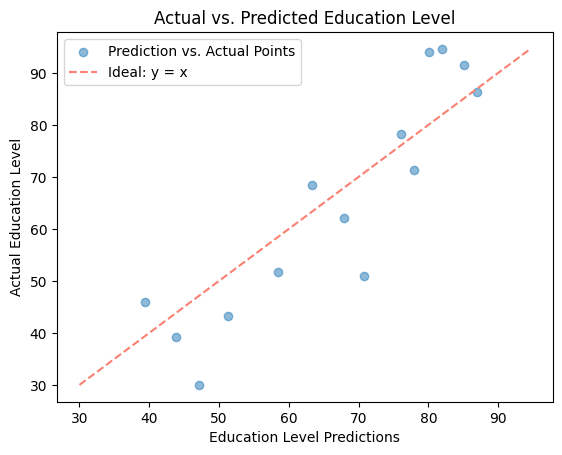

In [17]:
# actual vs. prediction on test
fig = plt.figure()
plt.scatter(predictions, y_test, alpha=0.5, label = 'Prediction vs. Actual Points') #test data points

# plot y=x line to determine accuracy of predictions
min_val = min(min(predictions), min(y_test))
max_val = max(max(predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], '--', color = 'salmon', label='Ideal: y = x')

#plt.xlim(0,35)
#plt.ylim(0,35)
plt.legend()
plt.xlabel('Education Level Predictions')
plt.ylabel('Actual Education Level')
plt.title("Actual vs. Predicted Education Level")
plt.show()

In [18]:
# evaluate model
mae_scratch = mean_absolute_error(y_test, predictions)
mse_scratch = mean_squared_error(y_test, predictions)
rmse_scratch = mse_scratch**0.5
r2_scratch = r2_score(y_test, predictions)

# print metrics
print(f"MAE: {mae_scratch:.2f}")
print(f"MSE: {mse_scratch:.2f}")
print(f"RMSE: {rmse_scratch:.2f}")
print(f"R² Score: {r2_scratch:.2f}")

MAE: 8.29
MSE: 96.97
RMSE: 9.85
R² Score: 0.78


### Conclusion

Using the algorithm implemented from scratch, we can see that the results are the exact same. Whether we use the sci-kit learn object or we implement the algorithm from scratch, k-nearest neighbors is a simple algorithm that allows us to make predictions on data sets, especially those that are smaller or less-involved.